使用收盤價預測，預測N日後的股價

In [1]:
!pip install yfinance
!pip install mplfinance

請輸入股票代號: 2330


[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2020-01-02 00:00:00+00:00,306.430206,339.0,339.0,332.5,332.5,31754120
1,2020-01-03 00:00:00+00:00,306.882111,339.5,345.0,335.5,344.0,41811268
2,2020-01-06 00:00:00+00:00,300.102753,332.0,334.5,332.0,333.0,45343057
3,2020-01-07 00:00:00+00:00,297.842926,329.5,333.0,326.5,332.5,50879181
4,2020-01-08 00:00:00+00:00,297.842926,329.5,333.0,325.0,325.0,37567748
...,...,...,...,...,...,...,...
728,2022-12-23 00:00:00+00:00,439.875092,455.0,458.5,455.0,457.5,24927413
729,2022-12-26 00:00:00+00:00,441.325226,456.5,457.0,453.5,454.0,8793306
730,2022-12-27 00:00:00+00:00,441.808624,457.0,462.5,457.0,458.0,10264001


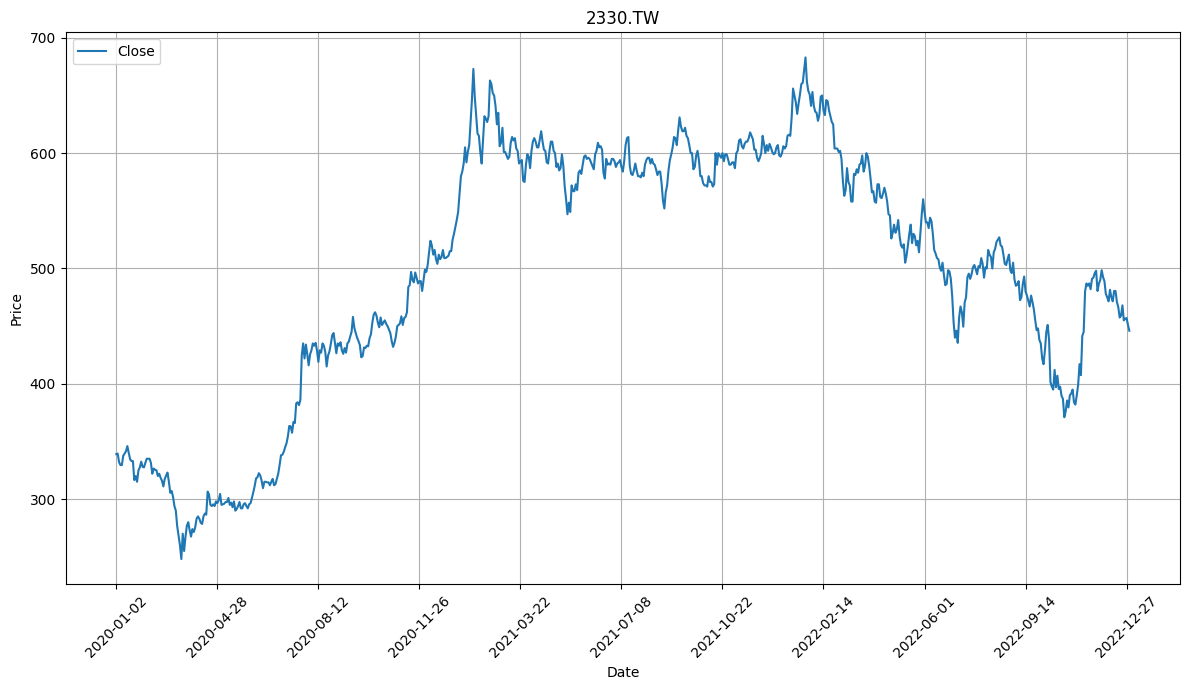

In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 輸入股票代號
stock_id = input("請輸入股票代號: ")+ ".TW"

'''今天往前算幾天'''
# 計算起始日期和結束日期（今天的日期和12個月前的日期）
#end_date = dt.date.today()
#start_date = end_date - dt.timedelta(days=365)

'''抓取特定時間'''
start_date = dt.datetime(2020, 1, 1)  # 指定的開始日期
end_date = dt.datetime(2022, 12, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間\
df = yf.download(stock_id, start=start_date, end=end_date).reset_index()

data = df['Close'].values
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
df

X_train shape: torch.Size([274, 360])
y_train shape: torch.Size([274, 100])
Epoch 0, Loss: 345492.53125
Epoch 20, Loss: 83437.6953125
Epoch 40, Loss: 10621.0888671875
Epoch 60, Loss: 2311.28759765625
Epoch 80, Loss: 1371.4793701171875
Epoch 100, Loss: 1143.5946044921875
Epoch 120, Loss: 1060.017578125
Epoch 140, Loss: 1016.9656982421875
Epoch 160, Loss: 989.1707153320312
Epoch 180, Loss: 969.2940063476562
Epoch 200, Loss: 953.751220703125
Epoch 220, Loss: 940.7053833007812
Epoch 240, Loss: 929.171142578125
Epoch 260, Loss: 918.5972290039062
Epoch 280, Loss: 908.650390625
Epoch 300, Loss: 899.106689453125
Epoch 320, Loss: 889.7987060546875
Epoch 340, Loss: 880.5891723632812
Epoch 360, Loss: 872.3468627929688
Epoch 380, Loss: 862.0827026367188
Epoch 400, Loss: 852.5979614257812
Epoch 420, Loss: 842.6783447265625
Epoch 440, Loss: 832.3865966796875
Epoch 460, Loss: 821.589111328125
Epoch 480, Loss: 810.2139892578125
Epoch 500, Loss: 798.2045288085938
Epoch 520, Loss: 794.8255615234375
Epoc

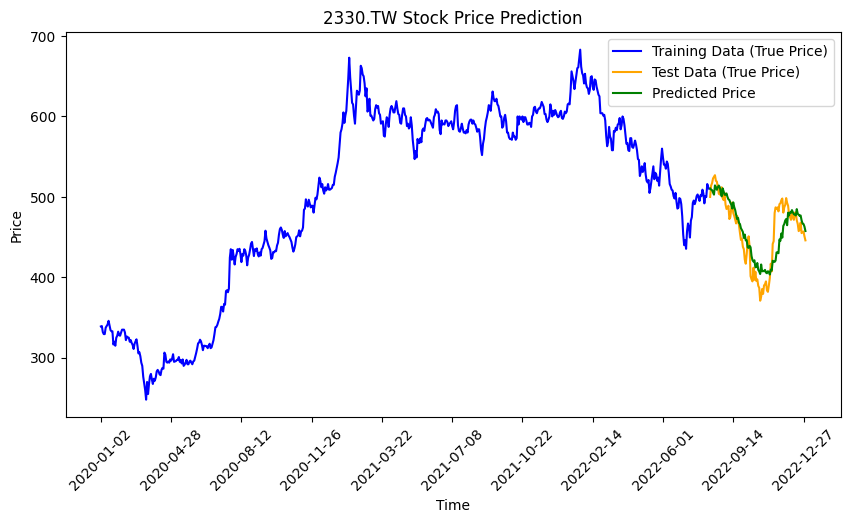

In [3]:

N = 100  # 預測N日後的收盤價
sequence_length = 360
# 數據預處理: 創建模型輸入和標籤
def create_sequences(data, sequence_length, forecast_days=1):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length - forecast_days + 1):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length:i + sequence_length + forecast_days])
    return np.array(sequences), np.array(targets)

# 使用 create_sequences 函數創建 X_train 和 y_train
X_train, y_train = create_sequences(data, sequence_length, N)

# 將數據轉換為 PyTorch 張量
X_train = torch.FloatTensor(X_train).squeeze(-1)   # X_train 形狀: (樣本數, 序列長度)
y_train = torch.FloatTensor(y_train).squeeze(-1)   # y_train 形狀: (樣本數, N)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
# 定義模型
class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(StockPredictor, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)  # 輸出未來 N 日的預測值

    def forward(self, x):
        x = x.view(-1, input_size)  # **確保形狀正確**
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# 初始化模型
input_size = sequence_length  # 對應於 X_train 的第二個維度
hidden_size = 64
output_size = N  # 預測 N 天的價格
model = StockPredictor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練模型
epochs = 4000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)  # 模型輸出形狀應為 (樣本數, N)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# 模型評估與預測
model.eval()
with torch.no_grad():
    predictions = model(X_train).numpy()

# 可視化結果
train_range = range(len(data) - N)  # 訓練集範圍
test_range = range(len(data) - N, len(data))  # 測試集範圍

plt.figure(figsize=(10, 5))
plt.plot(train_range, data[:-N], label="Training Data (True Price)", color="blue")
plt.plot(test_range, data[-N:], label="Test Data (True Price)", color="orange")
plt.plot(test_range, predictions[-1], label="Predicted Price", color="green")  # 顯示最後一個序列的預測
plt.title("2330.TW Stock Price Prediction")
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

實作 CNN 捕捉 K 線趨勢，並預測股價漲跌

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# 下載台積電股票數據
stock_id = "2330.TW"
start_date = "2020-01-01"
end_date = "2022-06-30"
df = yf.download(stock_id, start=start_date, end=end_date)

# 計算移動平均線
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()

# 標註漲跌
df['Label'] = np.where(df['MA5'] > df['MA10'], 1, 0)  # 1 表示「漲」，0 表示「跌」

# 構建 K 線圖圖像數據集
class StockDataset(Dataset):
    def __init__(self, data, window_size=20):
        self.data = data
        self.window_size = window_size
        self.transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        data_window = self.data.iloc[idx:idx + self.window_size]
        label = data_window['Label'].iloc[-1]  # 取窗口最後一天的標註作為該樣本的標籤
        fig, ax = plt.subplots(figsize=(3, 3))
        ax.plot(data_window.index, data_window['Close'], color="black")
        ax.plot(data_window.index, data_window['MA5'], color="green", label="MA5")
        ax.plot(data_window.index, data_window['MA10'], color="red", label="MA10")
        ax.axis('off')
        plt.close(fig)

        # 保存為圖像數據
        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        img = Image.fromarray(img)

        # 應用圖像變換
        img = self.transform(img)
        return img, label

# 創建數據集和數據加載器
dataset = StockDataset(df, window_size=20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 定義 CNN 模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)  # 二分類：漲或跌

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 訓練 CNN 模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練過程
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# 評估模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Accuracy: {100 * correct / total:.2f}%")
torch.save(model.state_dict(), "cnn_model.pth")
print("模型已保存為 cnn_model.pth")


[*********************100%***********************]  1 of 1 completed


Epoch [1/10], Loss: 0.7297
Epoch [2/10], Loss: 0.6937
Epoch [3/10], Loss: 0.6820
Epoch [4/10], Loss: 0.6281
Epoch [5/10], Loss: 0.4856
Epoch [6/10], Loss: 0.3779
Epoch [7/10], Loss: 0.3682
Epoch [8/10], Loss: 0.3307
Epoch [9/10], Loss: 0.2827
Epoch [10/10], Loss: 0.2475
Accuracy: 92.31%
模型已保存為 cnn_model.pth


<ipython-input-5-fd786aefdc32>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("cnn_model.pth", map_location=device))
[*******************

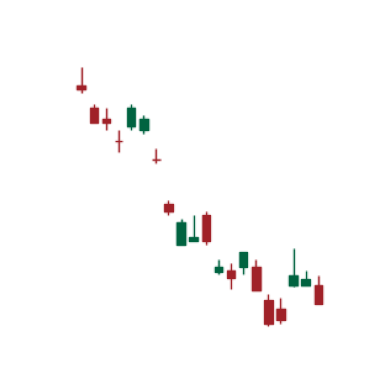

預測結果：跌


In [5]:
import mplfinance as mpf
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms

# 定義 CNN 模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)  # 二分類：漲或跌

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 加載模型（假設已經訓練好並保存為 'cnn_model.pth'）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
model.load_state_dict(torch.load("cnn_model.pth", map_location=device))
model.eval()

# 數據預處理函數
def prepare_kline_image(data, window_size=20, show_image=True):
    # 重新構建乾淨的 DataFrame，確保所有數據為浮點數並為一維
    data_window = pd.DataFrame({
        'Open': data['Open'].astype(float).values[-window_size:].flatten(),
        'High': data['High'].astype(float).values[-window_size:].flatten(),
        'Low': data['Low'].astype(float).values[-window_size:].flatten(),
        'Close': data['Close'].astype(float).values[-window_size:].flatten()
    }, index=pd.to_datetime(data.index[-window_size:]))

    # 使用 mplfinance 繪製蠟燭圖到內存
    fig, ax = plt.subplots(figsize=(3, 3))
    mpf.plot(data_window, type='candle', style='charles', ax=ax)
    ax.axis('off')  # 隱藏軸
    fig.canvas.draw()  # 渲染圖像到緩衝區

    # 將圖像數據轉換為 numpy 陣列並重塑為 RGB 格式
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    # 將 numpy 陣列轉換為 PIL 圖像
    img = Image.fromarray(img)

    # 顯示圖像（如果需要）
    if show_image:
        plt.imshow(img)
        plt.axis("off")
        plt.show()

    # 圖像轉換為 PyTorch 張量
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor()
    ])
    img = transform(img).unsqueeze(0)  # 增加 batch 維度
    return img
# 下載台積電股票數據，生成一張 K 線圖
stock_id = "2330.TW"
start_date = "2022-01-01"
end_date = "2022-06-30"
df = yf.download(stock_id, start=start_date, end=end_date)

# 準備單張 K 線圖的圖像數據
kline_image = prepare_kline_image(df, window_size=20, show_image=True)

# 進行單次預測
with torch.no_grad():
    output = model(kline_image)
    _, predicted = torch.max(output, 1)
    result = "漲" if predicted.item() == 1 else "跌"

print(f"預測結果：{result}")
